## About Dataset:
This dataset is originally from the National Institute of Diabetes and Digestive 
and Kidney Diseases. The objective of the dataset is to diagnostically predict 
whether a patient has diabetes based on certain diagnostic measurements 
included in the dataset. Several constraints were placed on the selection of 
these instances from a larger database. In particular, all patients here are 
females at least 21 years old of Pima Indian heritage.

### Import Libraries:

In [14]:
# Import Libraries requires for data manipulation and visualization
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from datetime import datetime as dt

### Objectives:
Upon examination, I discovered that the dataset contains data suitable for predictive analysis. 
- Predictive analysis is a type of analysis where this means understanding the probable future trends and behavior 
- To derive predictions from the given dataset, I partitioned the data into independent and dependent variables. Upon analysis, I observed that all seven variables i.e. Pregnancies, Glucose, Blood pressure, skin thickness, Insulin, BMI, Diabetes, Age are independent, while 'Outcome' serves as the dependent variable.  

## Data Description:
- Pregnancies: To express the Number of pregnancies

- Glucose: To express the Glucose level in blood

- BloodPressure: To express the Blood pressure measurement

- SkinThickness: To express the thickness of the skin

- Insulin: To express the Insulin level in blood

- BMI: To express the Body mass index

- DiabetesPedigreeFunction: To express the Diabetes percentage

- Age: To express the age

- Outcome: To express the final result 1 is Yes and 0 is No

### Import sklearn Libraries :N

In [94]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

### Data Description:
Contains 7 columns
• Pregnancies 
• Glucose 
• Blood Pressure 
• Skin Thickness 
• Insulin 
• BMI 
• Diabetes 
• Age 
• Outcome 

### The Work Flow:

- Import Libraries
- Load the data
- Data Processing
- EDA
- Correlation with visualization 
- Data Visualization and interpretation
- Conclusions

In [16]:
# Load the data

df = pd.read_csv("C:\\Users\\T\Desktop\\MeriSkill\\Projects\\Project 2 - Diabetes Data\diabetes.csv")
df.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


### Note
'Outcome' serves as the dependent variable.  From the given dataset, 0 represents that the person is not diabetic and 1 shows that 
the person is diabetic.

### Data Processing

In [17]:
# Data inspection

df.shape

(768, 9)

In [18]:
# Data information

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


<Axes: >

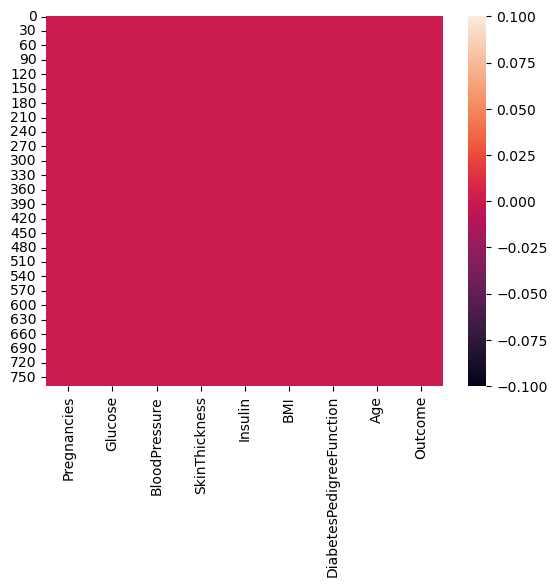

In [19]:
sns.heatmap(df.isnull())

#### Observation:
Data is clean, no missing value observed.

In [20]:
# Summary of the data

df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [21]:
df[df.duplicated()]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome


#### Observation:
No Duplicate of records

## EDA 

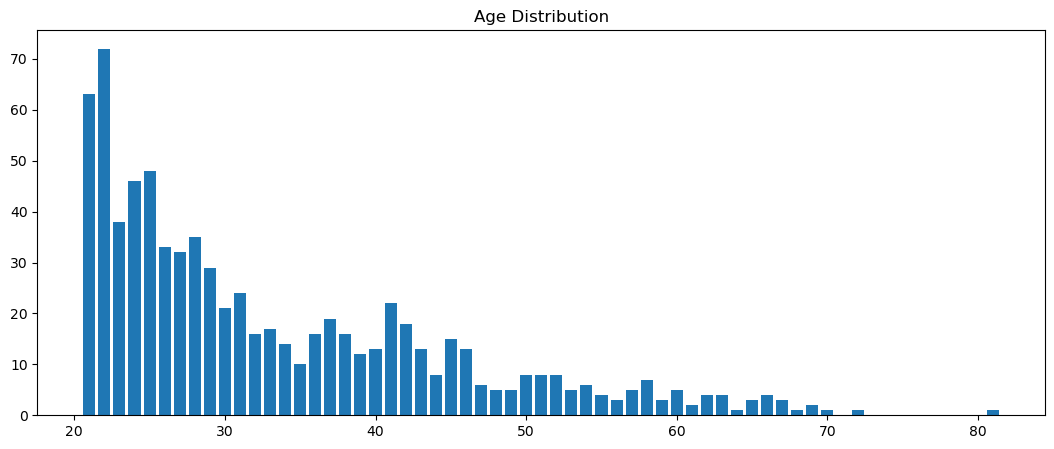

In [30]:
# visualize the age distribution across the dataset
plt.figure(figsize=(13, 5))
plt.title('Age Distribution')
plt.bar(x=df['Age'].value_counts().index.tolist(), height=df['Age'].value_counts().values.tolist())
plt.show()

### Observation:
- The age range between 22 to 32 has high frequency meaning that the age group of diabetics are between 22 to 32 of age.

In [31]:
df['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

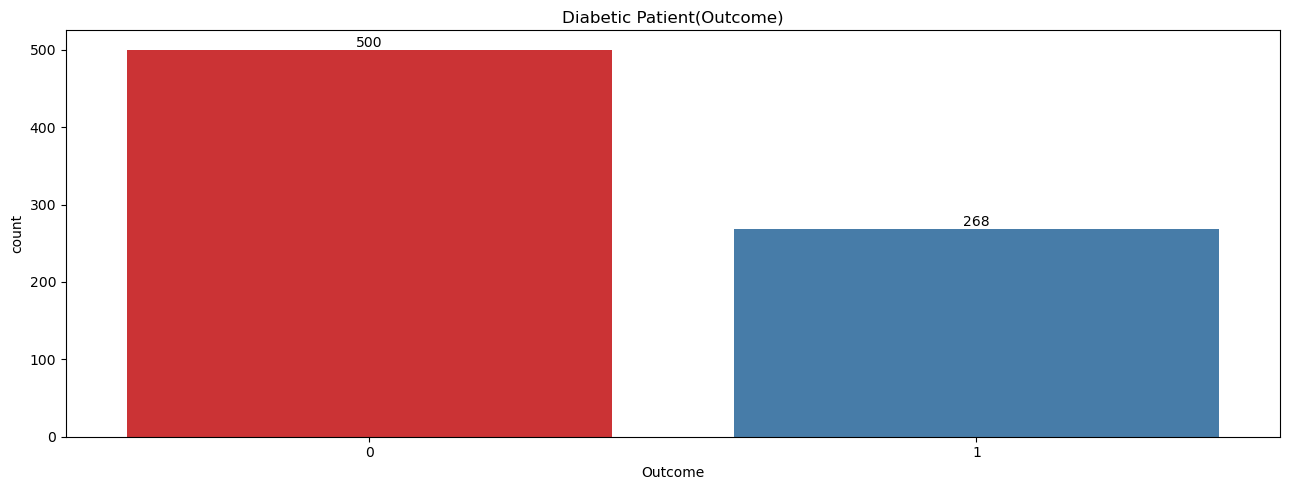

In [39]:
plt.figure(figsize=(13, 5))
ax = sns.countplot(data=df, x='Outcome', palette='Set1')

# Add data labels above each bar (using format code '.0f' for floats)
for p in ax.patches:
    ax.annotate(format(p.get_height(), ',.0f'),  # Format as float with thousands separator
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom')

plt.title('Diabetic Patient(Outcome)')
plt.tight_layout()
plt.show()

### Observation:
- 1 means Those with Diabetics
- 0 means No Diabetic 
- Outcome is a Dependent Variable
- Total number of people with Diabetics is 268.

## Correlations:
Checking for the relationship between fileds, is the correlation positive, negative or no relationship at all.

In [49]:
# Calculate correlations

correlation = df.corr()
correlation

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


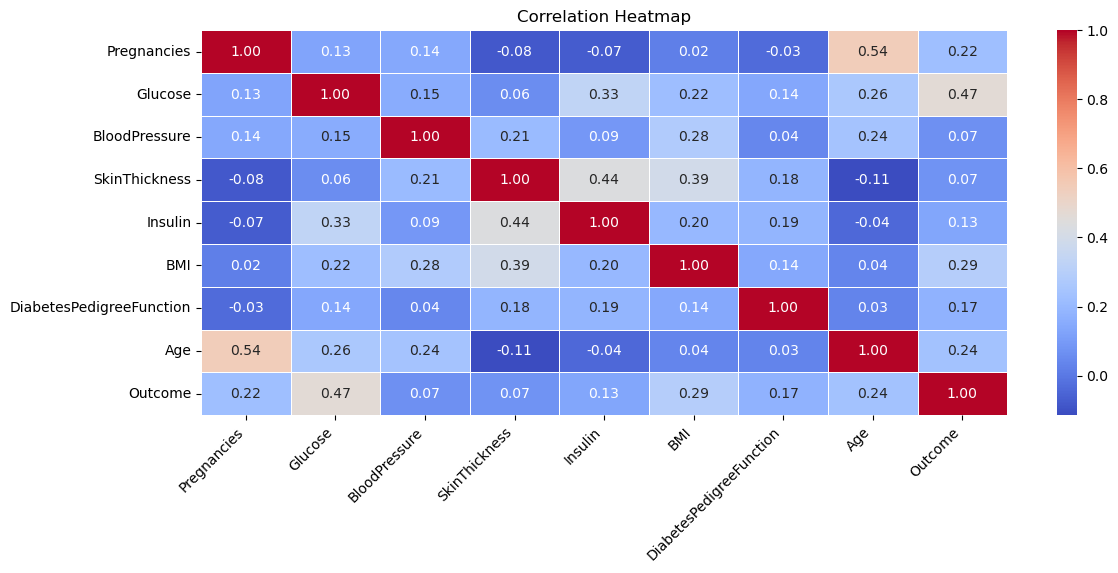

In [53]:
# Create the heatmap
plt.figure(figsize=(13, 5))
sns.heatmap(correlation,
            cmap='coolwarm',  # Choose a color palette (optional)
            annot=True,        # Display correlation values in cells (optional)
            linewidths=0.5,    # Adjust line widths between cells (optional)
            fmt='.2f')         # Format correlation values (optional)

# Customize the plot
plt.title('Correlation Heatmap')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for readability
plt.show()


### Observation:
- The matrix is a table in which every cell contains a correlation coefficient, where 1 is considered a strong relationship between variables, 0 a neutral relationship and -1 a not strong relationship.
Higher number of pregnancies are associated with higher blood glucose and insulin levels.
High blood glucose levels are linked to higher blood pressure, BMI, and genetic risk of diabetes.
High blood pressure is often accompanied by higher BMI and genetic risk of diabetes.
Thicker skin is associated with higher BMI and genetic risk of diabetes.
High insulin levels are linked to higher BMI and genetic risk of diabetes.
Higher BMI is associated with increased genetic risk of diabetes.etes.diabetics

Correlations with Outcome:
Glucose                     0.466581
BMI                         0.292695
Age                         0.238356
Pregnancies                 0.221898
DiabetesPedigreeFunction    0.173844
Insulin                     0.130548
SkinThickness               0.074752
BloodPressure               0.065068
Name: Outcome, dtype: float64


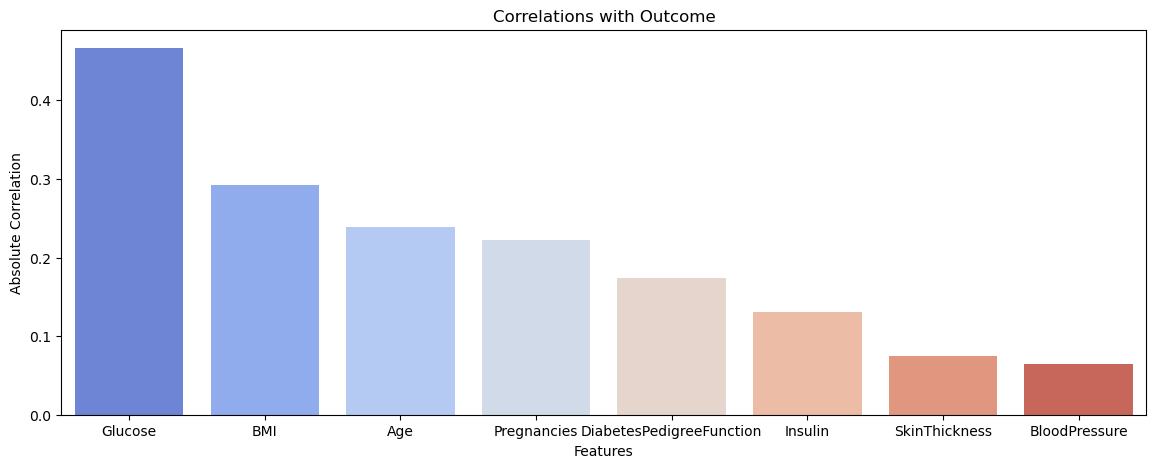

In [61]:
correlation_matrix = df.corr()
outcome_correlations = correlation_matrix['Outcome'].drop('Outcome')  # Drop the Outcome column itself
sorted_correlations = outcome_correlations.abs().sort_values(ascending=False)
print("Correlations with Outcome:")
print(sorted_correlations)


plt.figure(figsize=(14, 5))
sns.barplot(x=sorted_correlations.index, y=sorted_correlations.values, palette='coolwarm')
plt.title('Correlations with Outcome')
plt.xlabel('Features')
plt.ylabel('Absolute Correlation')
plt.show()

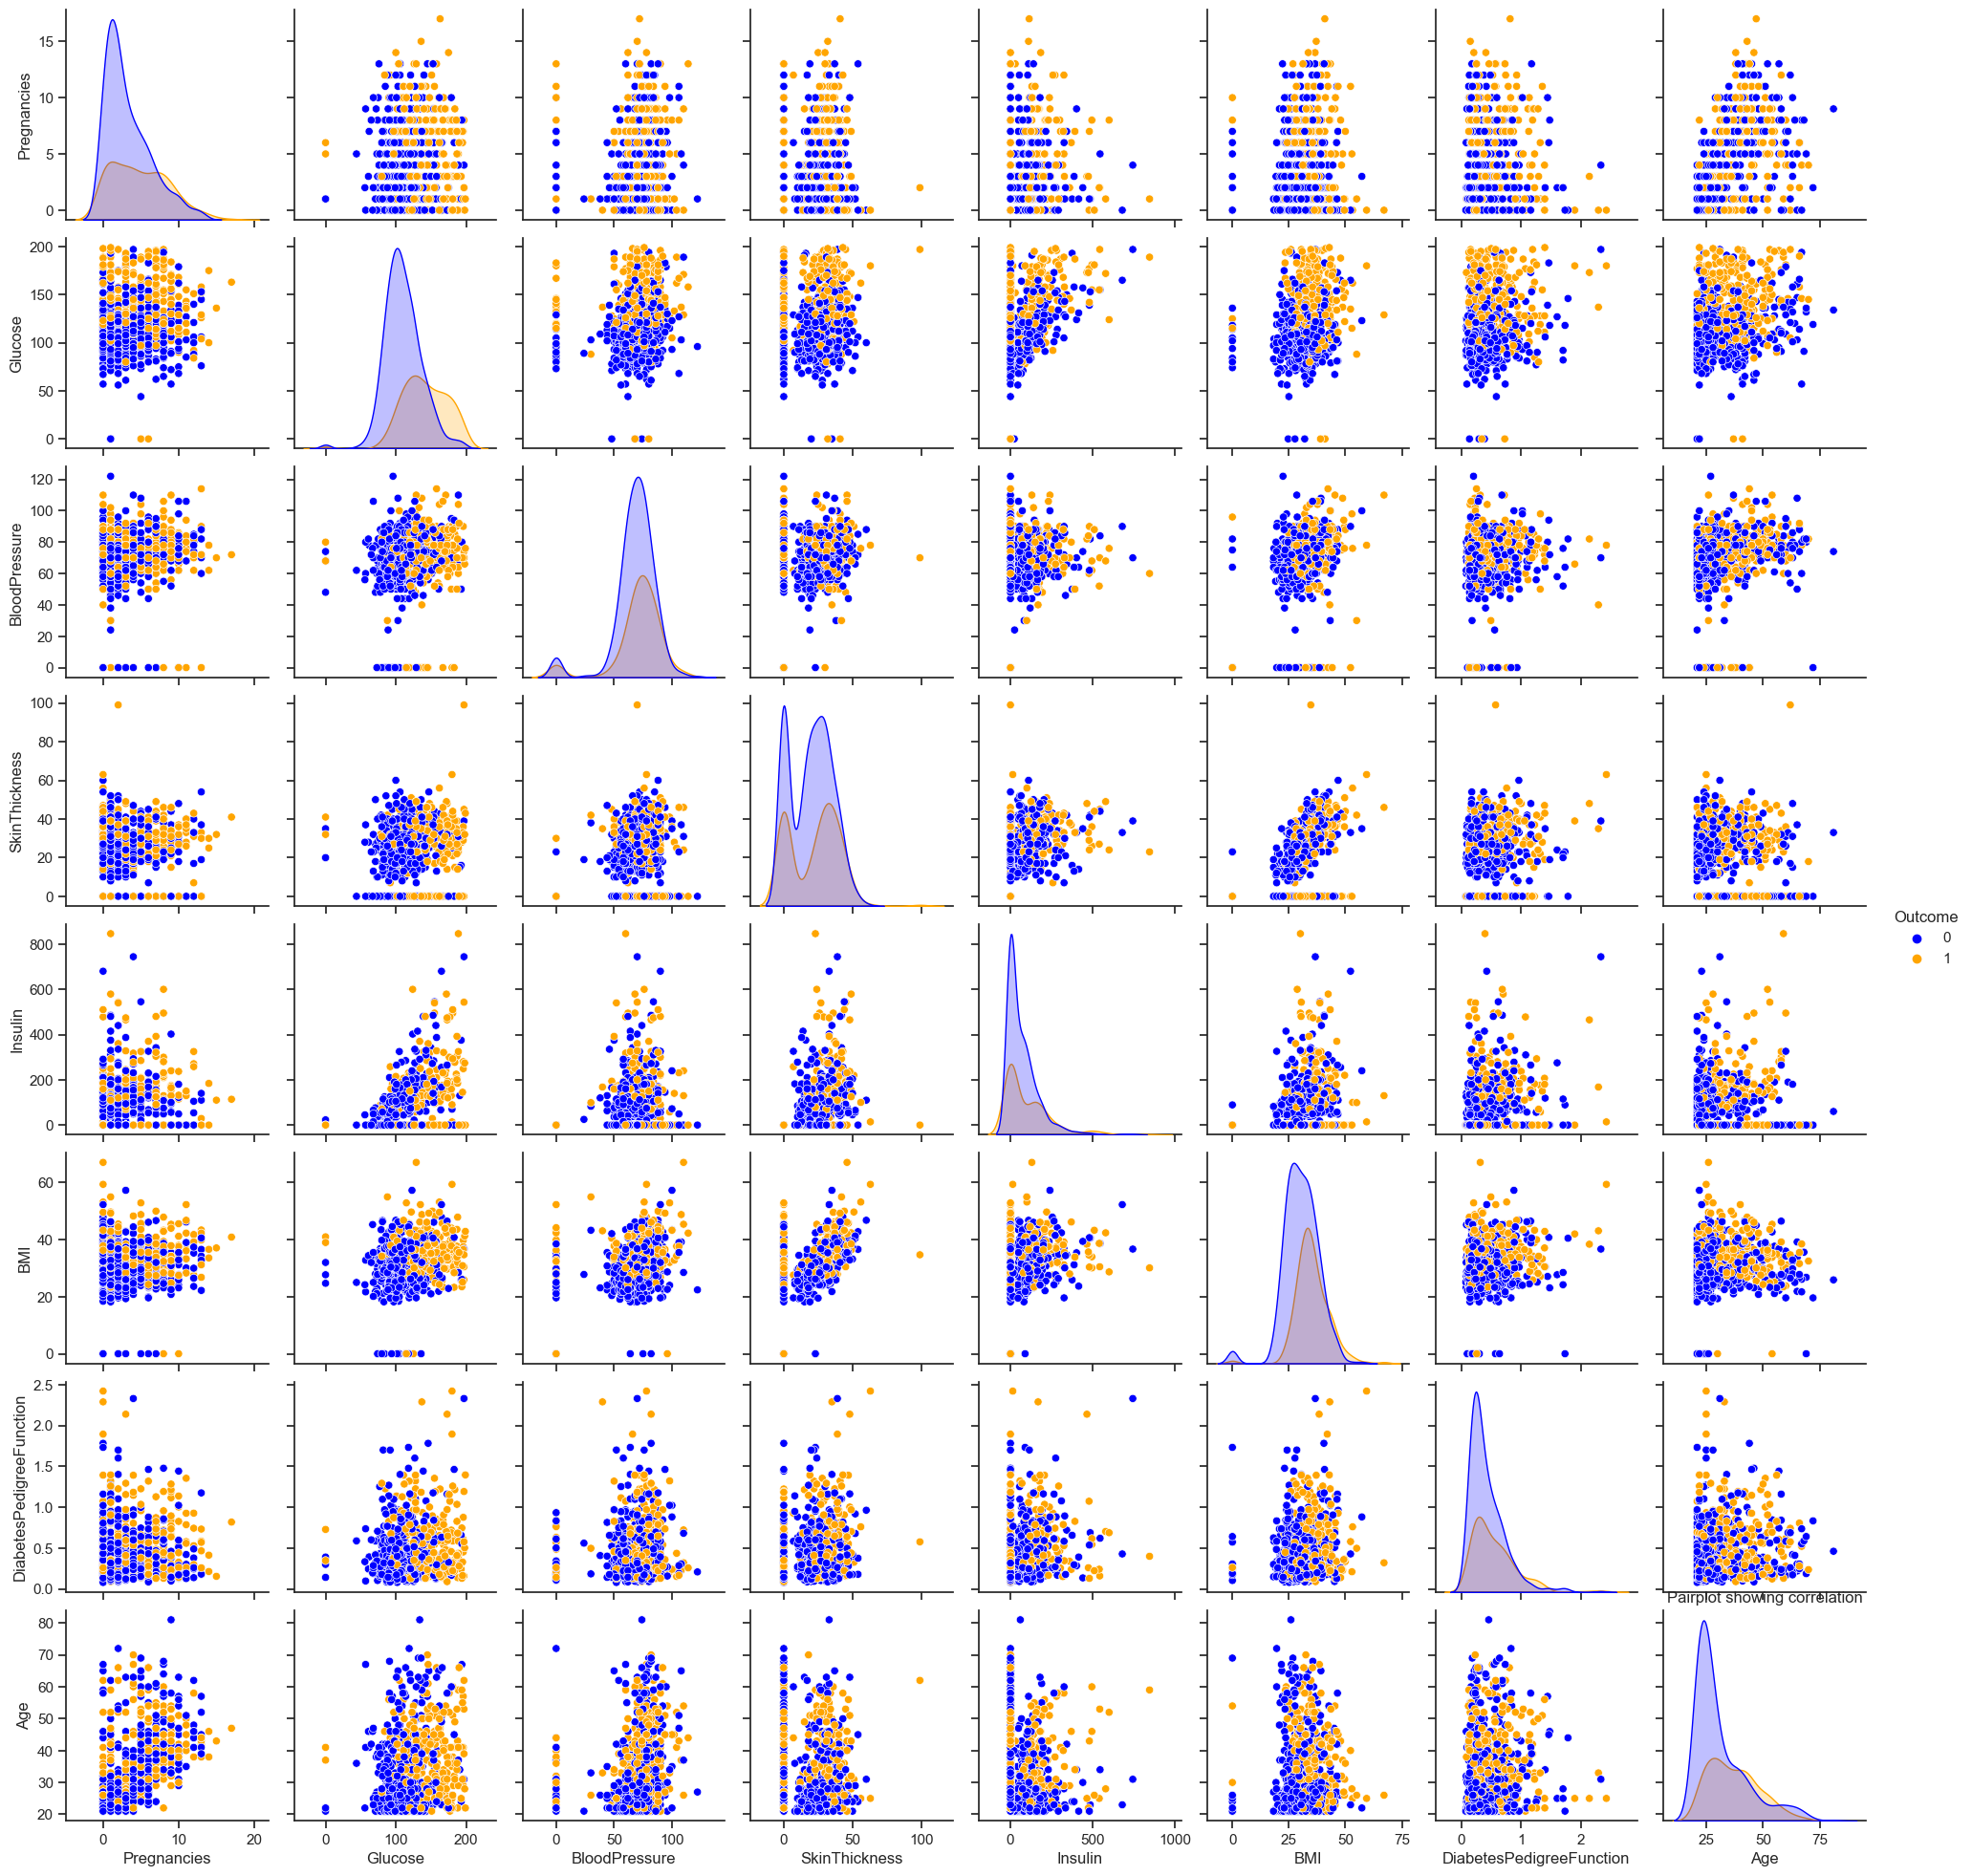

In [63]:
### Display a custom pairplot to visualize the correlation
sns.set(style="ticks")
sns.pairplot(df, hue='Outcome', palette={0: 'blue', 1: 'orange'})
plt.title('Pairplot showing correlation')
plt.show()

## Train Test Split:
in X all the independent variables are stored  
In Y the predictor variable(“OUTCOME”) is stored. 
Train-test split is a technique used in machine learning to assess model performance. It 
divides the dataset into a training set and a testing set, with a 0.2 test size indicating that 
20% of the data is used for testing and 80% for training.  

In [82]:
features = df.drop('Outcome', axis=1)
labels = df['Outcome']

X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=42)

### Visualizing Correlation 

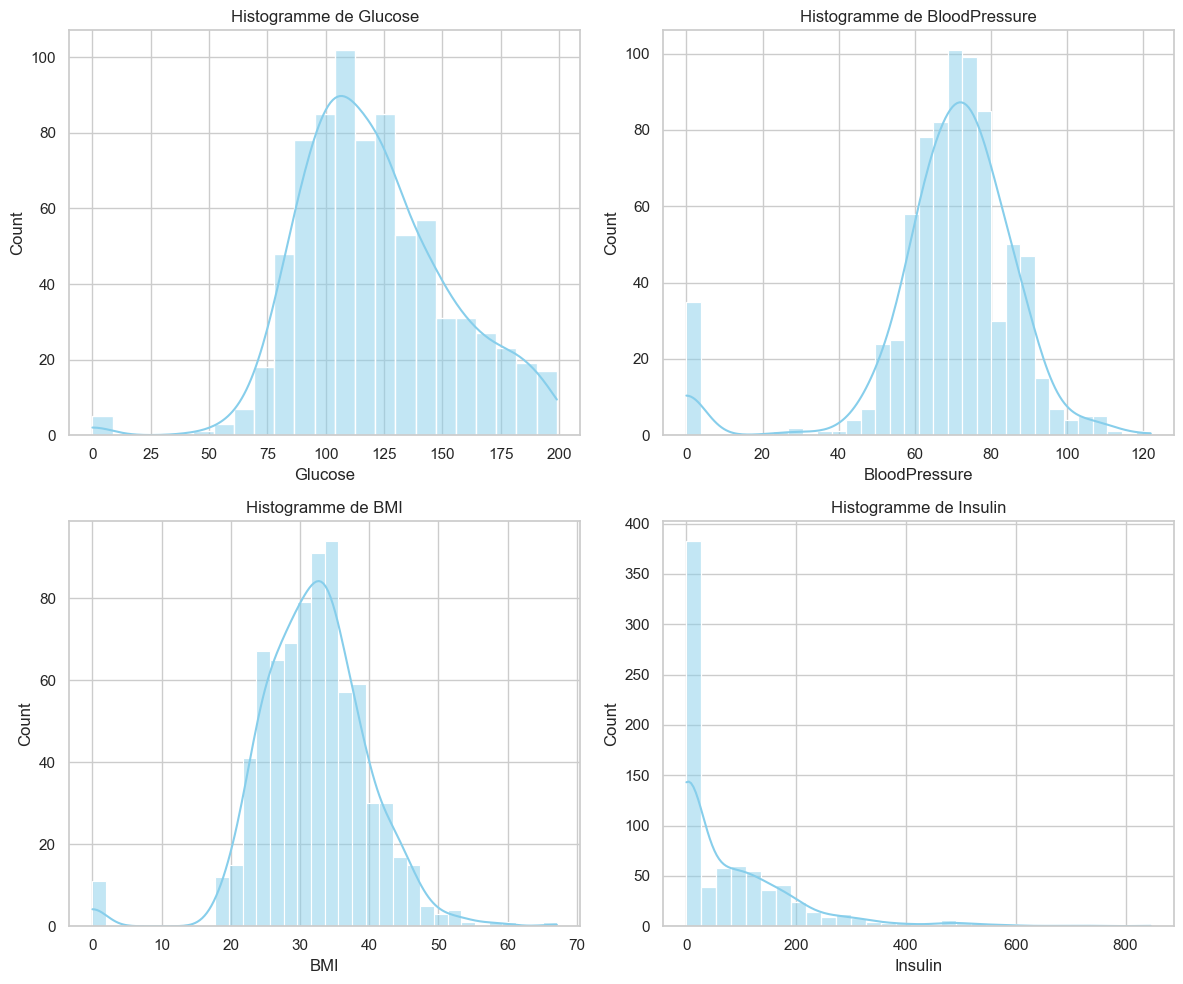

In [73]:
### Display the histograms of the variables Glucose and BloodPressure, BMI, and Insulin.
# Create an array with the columns needed.
columns_to_plot = ['Glucose', 'BloodPressure', 'BMI', 'Insulin']

# Configuration of the Seaborn style
sns.set(style="whitegrid")

# Create grids for histograms
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 10))

# Iterate over specified columns and plot histograms
for i, column in enumerate(columns_to_plot):
    sns.histplot(df[column], kde=True, ax=axes[i//2, i%2], color='skyblue')
    axes[i//2, i%2].set_title(f'Histogramme de {column}')

# Adjust spacing between subgraphs
plt.tight_layout()

# Display Histograms
plt.show()

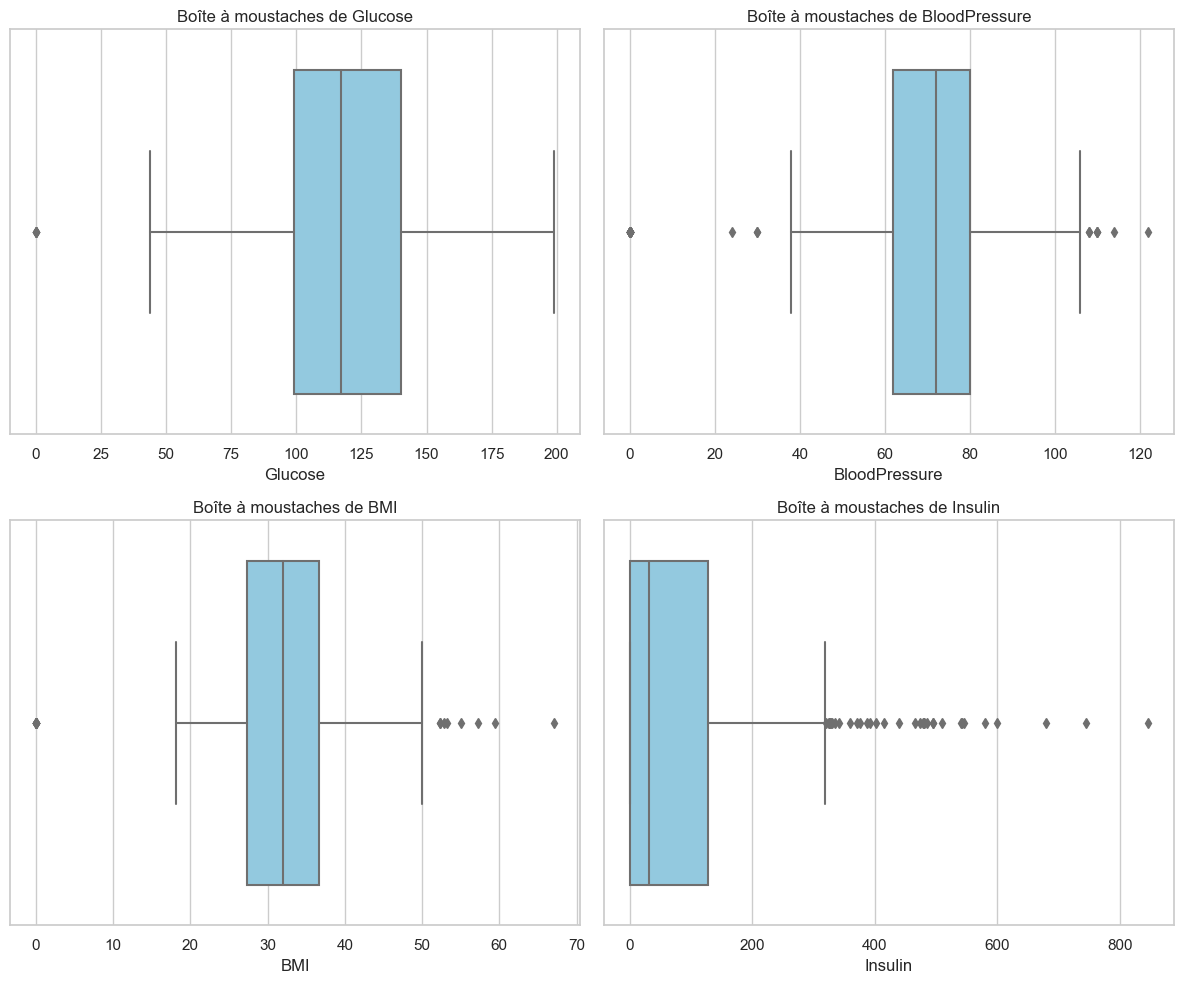

In [74]:
### Display mustach boxes of the variables Glucose and BloodPressure, BMI, and Insulin.
# Create an array with the columns needed.
columns_to_plot = ['Glucose', 'BloodPressure', 'BMI', 'Insulin']

# Configuration of the Seaborn style
sns.set(style="whitegrid")

# Create grids for mustach boxes
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 10))

# Iterate over specified columns and boxplots
for i, column in enumerate(columns_to_plot):
    sns.boxplot(x=df[column], ax=axes[i//2, i%2], color='skyblue')
    axes[i//2, i%2].set_title(f'Boîte à moustaches de {column}')

# Adjust spacing between subgraphs
plt.tight_layout()

# Display boxplots
plt.show()

### Train-Test-Split

In [97]:
features = df.drop('Outcome', axis=1)
labels = df['Outcome']

X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=42)

### Feature Standardization

In [105]:
# Standardize features (not needed for XGBoost and LSTM)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### Logistic Regression

In [103]:
lr_model = LogisticRegression()
lr_model.fit(X_train_scaled, y_train)
lr_pred = lr_model.predict(X_test_scaled)
lr_accuracy = accuracy_score(y_test, lr_pred)
print(f"Logistic Regression Accuracy: {lr_accuracy:.2f}")
lr_conf_matrix = confusion_matrix(y_test, lr_pred)
lr_classification_report = classification_report(y_test, lr_pred)

print("\nLogistic Regression Confusion Matrix:")
print(lr_conf_matrix)
print("\nLogistic Regression Classification Report:")
print(lr_classification_report)

Logistic Regression Accuracy: 0.75

Logistic Regression Confusion Matrix:
[[79 20]
 [18 37]]

Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.80      0.81        99
           1       0.65      0.67      0.66        55

    accuracy                           0.75       154
   macro avg       0.73      0.74      0.73       154
weighted avg       0.76      0.75      0.75       154



### Support vector machine (svm)

In [104]:
svm_model = SVC()
svm_model.fit(X_train_scaled, y_train)
svm_pred = svm_model.predict(X_test_scaled)
svm_accuracy = accuracy_score(y_test, svm_pred)
print(f"SVM Accuracy: {svm_accuracy:.2f}")

svm_conf_matrix = confusion_matrix(y_test, svm_pred)
svm_classification_report = classification_report(y_test, svm_pred)

print("SVM Confusion Matrix:")
print(svm_conf_matrix)
print("\nSVM Classification Report:")
print(svm_classification_report)

SVM Accuracy: 0.73
SVM Confusion Matrix:
[[82 17]
 [24 31]]

SVM Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.83      0.80        99
           1       0.65      0.56      0.60        55

    accuracy                           0.73       154
   macro avg       0.71      0.70      0.70       154
weighted avg       0.73      0.73      0.73       154



## Conclusion

Logistic Regression was performed here. Next is creating a html site to predict our outcome i.e predicting diabetic patient.